In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

In [11]:
df = pd.read_csv(os.path.join('renewable_energy_generation_consumption_by_source_GAFP.csv'))



In [12]:
df

,Annual Total,Biofuels Production (Trillion Btu),Total Biomass Energy Production (Trillion Btu),Total Renewable Energy Production (Trillion Btu),Hydroelectric Power Consumption (Trillino Btu),...,Wood Energy Consumption (Trillion Btu),Waste Energy Consumption (Trillion Btu),Biofuels Consumption (Trillion Btu),Total Biomass Energy Consumption (Trillion Btu),Total Renewable Energy Consumption (Trillino Btu)
0,1949,NaN,1549.262,2973.984,1424.722,...,1549.262,NaN,NaN,1549.262,2973.984
1,1950,NaN,1562.307,2977.718,1415.411,...,1562.307,NaN,NaN,1562.307,2977.718
2,1951,NaN,1534.669,2958.464,1423.795,...,1534.669,NaN,NaN,1534.669,2958.464
3,1952,NaN,1474.369,2940.181,1465.812,...,1474.369,NaN,NaN,1474.369,2940.181
4,1953,NaN,1418.601,2831.460,1412.859,...,1418.601,NaN,NaN,1418.601,2831.460
...,...,...,...,...,...,...,...,...,...,...,...
62,2011,2029.308,4501.348,9089.432,3102.852,...,2010.246,461.793,1933.413,4405.452,8993.537
63,2012,1928.887,4405.757,8734.220,2628.702,...,2010.266,466.604,1892.252,4369.122,8697.585
64,2013,1980.940,4646.919,9237.442,2562.382,...,2169.543,496.436,2007.181,4673.160,9263.683
65,2014,2103.411,4848.900,9578.682,2466.577,...,2229.612,515.877,2066.833,4812.322,9542.104


In [19]:
df.dropna(inplace = True)

df.isnull().sum().sum()

0

After dropping null values, the time series analysis will begin in the year 1984 to the present. Some energy sources did not have historical data before 1984. knn analysis might be conducted to predict what these values might have been if necessary.


In [20]:
df

,Annual Total,Biofuels Production (Trillion Btu),Total Biomass Energy Production (Trillion Btu),Total Renewable Energy Production (Trillion Btu),Hydroelectric Power Consumption (Trillino Btu),...,Wood Energy Consumption (Trillion Btu),Waste Energy Consumption (Trillion Btu),Biofuels Consumption (Trillion Btu),Total Biomass Energy Consumption (Trillion Btu),Total Renewable Energy Consumption (Trillino Btu)
35,1984,77.302,2971.120,6437.864,3385.811,...,2685.817,208.000,77.302,2971.120,6437.864
36,1985,93.151,3016.233,6084.017,2970.192,...,2686.765,236.317,93.151,3016.233,6084.017
37,1986,107.099,2932.095,6111.140,3071.179,...,2562.134,262.861,107.099,2932.095,6111.140
38,1987,122.725,2874.884,5621.807,2634.508,...,2463.159,289.000,122.725,2874.884,5621.807
39,1988,124.058,3016.049,5456.754,2334.265,...,2576.663,315.328,124.058,3016.049,5456.754
...,...,...,...,...,...,...,...,...,...,...,...
62,2011,2029.308,4501.348,9089.432,3102.852,...,2010.246,461.793,1933.413,4405.452,8993.537
63,2012,1928.887,4405.757,8734.220,2628.702,...,2010.266,466.604,1892.252,4369.122,8697.585
64,2013,1980.940,4646.919,9237.442,2562.382,...,2169.543,496.436,2007.181,4673.160,9263.683
65,2014,2103.411,4848.900,9578.682,2466.577,...,2229.612,515.877,2066.833,4812.322,9542.104


In [21]:
df.describe()

,Annual Total,Biofuels Production (Trillion Btu),Total Biomass Energy Production (Trillion Btu),Total Renewable Energy Production (Trillion Btu),Hydroelectric Power Consumption (Trillino Btu),...,Wood Energy Consumption (Trillion Btu),Waste Energy Consumption (Trillion Btu),Biofuels Consumption (Trillion Btu),Total Biomass Energy Consumption (Trillion Btu),Total Renewable Energy Consumption (Trillino Btu)
count,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000
mean,1999.500000,664.850656,3337.094969,6779.491312,2831.158437,...,2240.602531,431.641687,659.885156,3332.129438,6774.525719
std,9.380832,747.014904,668.072047,1231.860868,354.031032,...,222.481934,94.382730,734.261037,655.308221,1219.217778
min,1984.000000,77.302000,2624.162000,5161.518000,2241.858000,...,1931.010000,208.000000,77.302000,2622.356000,5159.712000
25%,1991.750000,137.963000,2930.991000,6056.676000,2603.672500,...,2054.321250,394.681500,139.091750,2930.631000,6060.774750
50%,1999.500000,221.977500,3021.883500,6336.232500,2747.740500,...,2214.124500,445.701000,222.339500,3021.883500,6336.232500
75%,2007.250000,1071.052750,3571.122500,7059.873750,3052.588000,...,2370.149500,511.560500,1076.396500,3576.466000,7053.643250
max,2015.000000,2161.135000,4848.900000,9578.682000,3640.458000,...,2686.765000,576.990000,2142.151000,4812.322000,9555.606000


In [22]:
df.corr()

,Annual Total,Biofuels Production (Trillion Btu),Total Biomass Energy Production (Trillion Btu),Total Renewable Energy Production (Trillion Btu),Hydroelectric Power Consumption (Trillino Btu),...,Wood Energy Consumption (Trillion Btu),Waste Energy Consumption (Trillion Btu),Biofuels Consumption (Trillion Btu),Total Biomass Energy Consumption (Trillion Btu),Total Renewable Energy Consumption (Trillino Btu)
Annual Total,1.000000,0.867123,0.768074,0.737918,-0.412843,...,-0.820050,0.506675,0.871486,0.771047,0.739127
Biofuels Production (Trillion Btu),0.867123,1.000000,0.966604,0.913595,-0.429795,...,-0.582657,0.300659,0.999620,0.965543,0.912379
Total Biomass Energy Production (Trillion Btu),0.768074,0.966604,1.000000,0.962481,-0.326846,...,-0.381868,0.328057,0.965586,0.999524,0.961737
Total Renewable Energy Production (Trillion Btu),0.737918,0.913595,0.962481,1.000000,-0.107518,...,-0.358199,0.426248,0.912013,0.961674,0.999860
Hydroelectric Power Consumption (Trillino Btu),-0.412843,-0.429795,-0.326846,-0.107518,1.000000,...,0.389847,0.169234,-0.435852,-0.331634,-0.107785
...,...,...,...,...,...,...,...,...,...,...,...
Wood Energy Consumption (Trillion Btu),-0.820050,-0.582657,-0.381868,-0.358199,0.389847,...,1.000000,-0.448638,-0.584296,-0.379802,-0.356805
Waste Energy Consumption (Trillion Btu),0.506675,0.300659,0.328057,0.426248,0.169234,...,-0.448638,1.000000,0.300323,0.328219,0.427320
Biofuels Consumption (Trillion Btu),0.871486,0.999620,0.965586,0.912013,-0.435852,...,-0.584296,0.300323,1.000000,0.965364,0.911242
Total Biomass Energy Consumption (Trillion Btu),0.771047,0.965543,0.999524,0.961674,-0.331634,...,-0.379802,0.328219,0.965364,1.000000,0.961439


In [23]:
df.var()

Annual Total                                         8.800000e+01
Biofuels Production (Trillion Btu)                   5.580313e+05
Total Biomass Energy Production (Trillion Btu)       4.463203e+05
Total Renewable Energy Production (Trillion Btu)     1.517481e+06
Hydroelectric Power Consumption (Trillino Btu)       1.253380e+05
                                                         ...     
Wood Energy Consumption (Trillion Btu)               4.949821e+04
Waste Energy Consumption (Trillion Btu)              8.908100e+03
Biofuels Consumption (Trillion Btu)                  5.391393e+05
Total Biomass Energy Consumption (Trillion Btu)      4.294289e+05
Total Renewable Energy Consumption (Trillino Btu)    1.486492e+06
dtype: float64

In [25]:
df.shape

(32, 13)

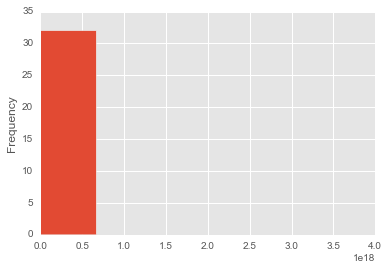

In [35]:
df["Hydroelectric Power Consumption (Trillino Btu)"].plot(kind = 'hist', range = (0, 4000000000000000000), bins = 6)